1) 문제 정의 (MD)

위상 정렬 알고리즘(축소 정복 기법)
주어진 방향 그래프에서 각 노드가 작업을 나타내며, 간선은 작업 간의 선후 관계를 나타냅니다. 이때, 모든 작업을 선후 관계에 맞게 순서대로 수행할 수 있는 순서를 찾는 것이 목표입니다. 이를 위해 주어진 방향 그래프가 사이클을 포함하지 않는다고 가정합니다.

즉, 위상 정렬 문제는 다음과 같이 정의할 수 있습니다.

입력: 방향 그래프 (노드는 작업을 나타내고, 간선은 작업 간의 선후 관계를 나타냄)
출력: 작업을 수행할 수 있는 순서를 나타내는 순서 리스트
예를 들어, 어떤 작업 A를 수행하기 위해 선행되어야 하는 작업 B가 있다면, 방향 그래프에서 노드 B에서 노드 A로의 간선이 존재합니다. 위상 정렬은 이러한 선후 관계를 만족하면서 모든 작업을 순서대로 수행할 수 있는 순서를 찾습니다.

2) 알고리즘 설명  (MD)
위상 정렬 알고리즘
– 진입 차수(in-degree)가 0인 임의의 정점을 시작 정점으로 선택
– 깊이 우선 탐색으로 그래프의 정점들을 방문(방문한 진입차수 갱신 -1)
– 더 이상 갈 수 있는 정점이 없으면 다른 진입 차수가 0인 정점 선택
– 이 과정을 모든 진입차수가 0인 정점에서 처리
– 이때, 정점을 방문하는 순서가 위상 순서(topological order)

위상 정렬 알고리즘(축소 정복 기법)
진입 차수가 0인 임의의 정점 선택, 간선과 함께 삭제
– 남은 그래프는 크기가 1 줄어듦 → 축소 정복
– 정점 삭제 시 인접한 정점의 진입 차수를 갱신해야 함.
– 이 과정을 반복 → 정점 삭제 순서가 위상 순서

3) 손으로 푼 예제 (MD, 이미지 삽입)
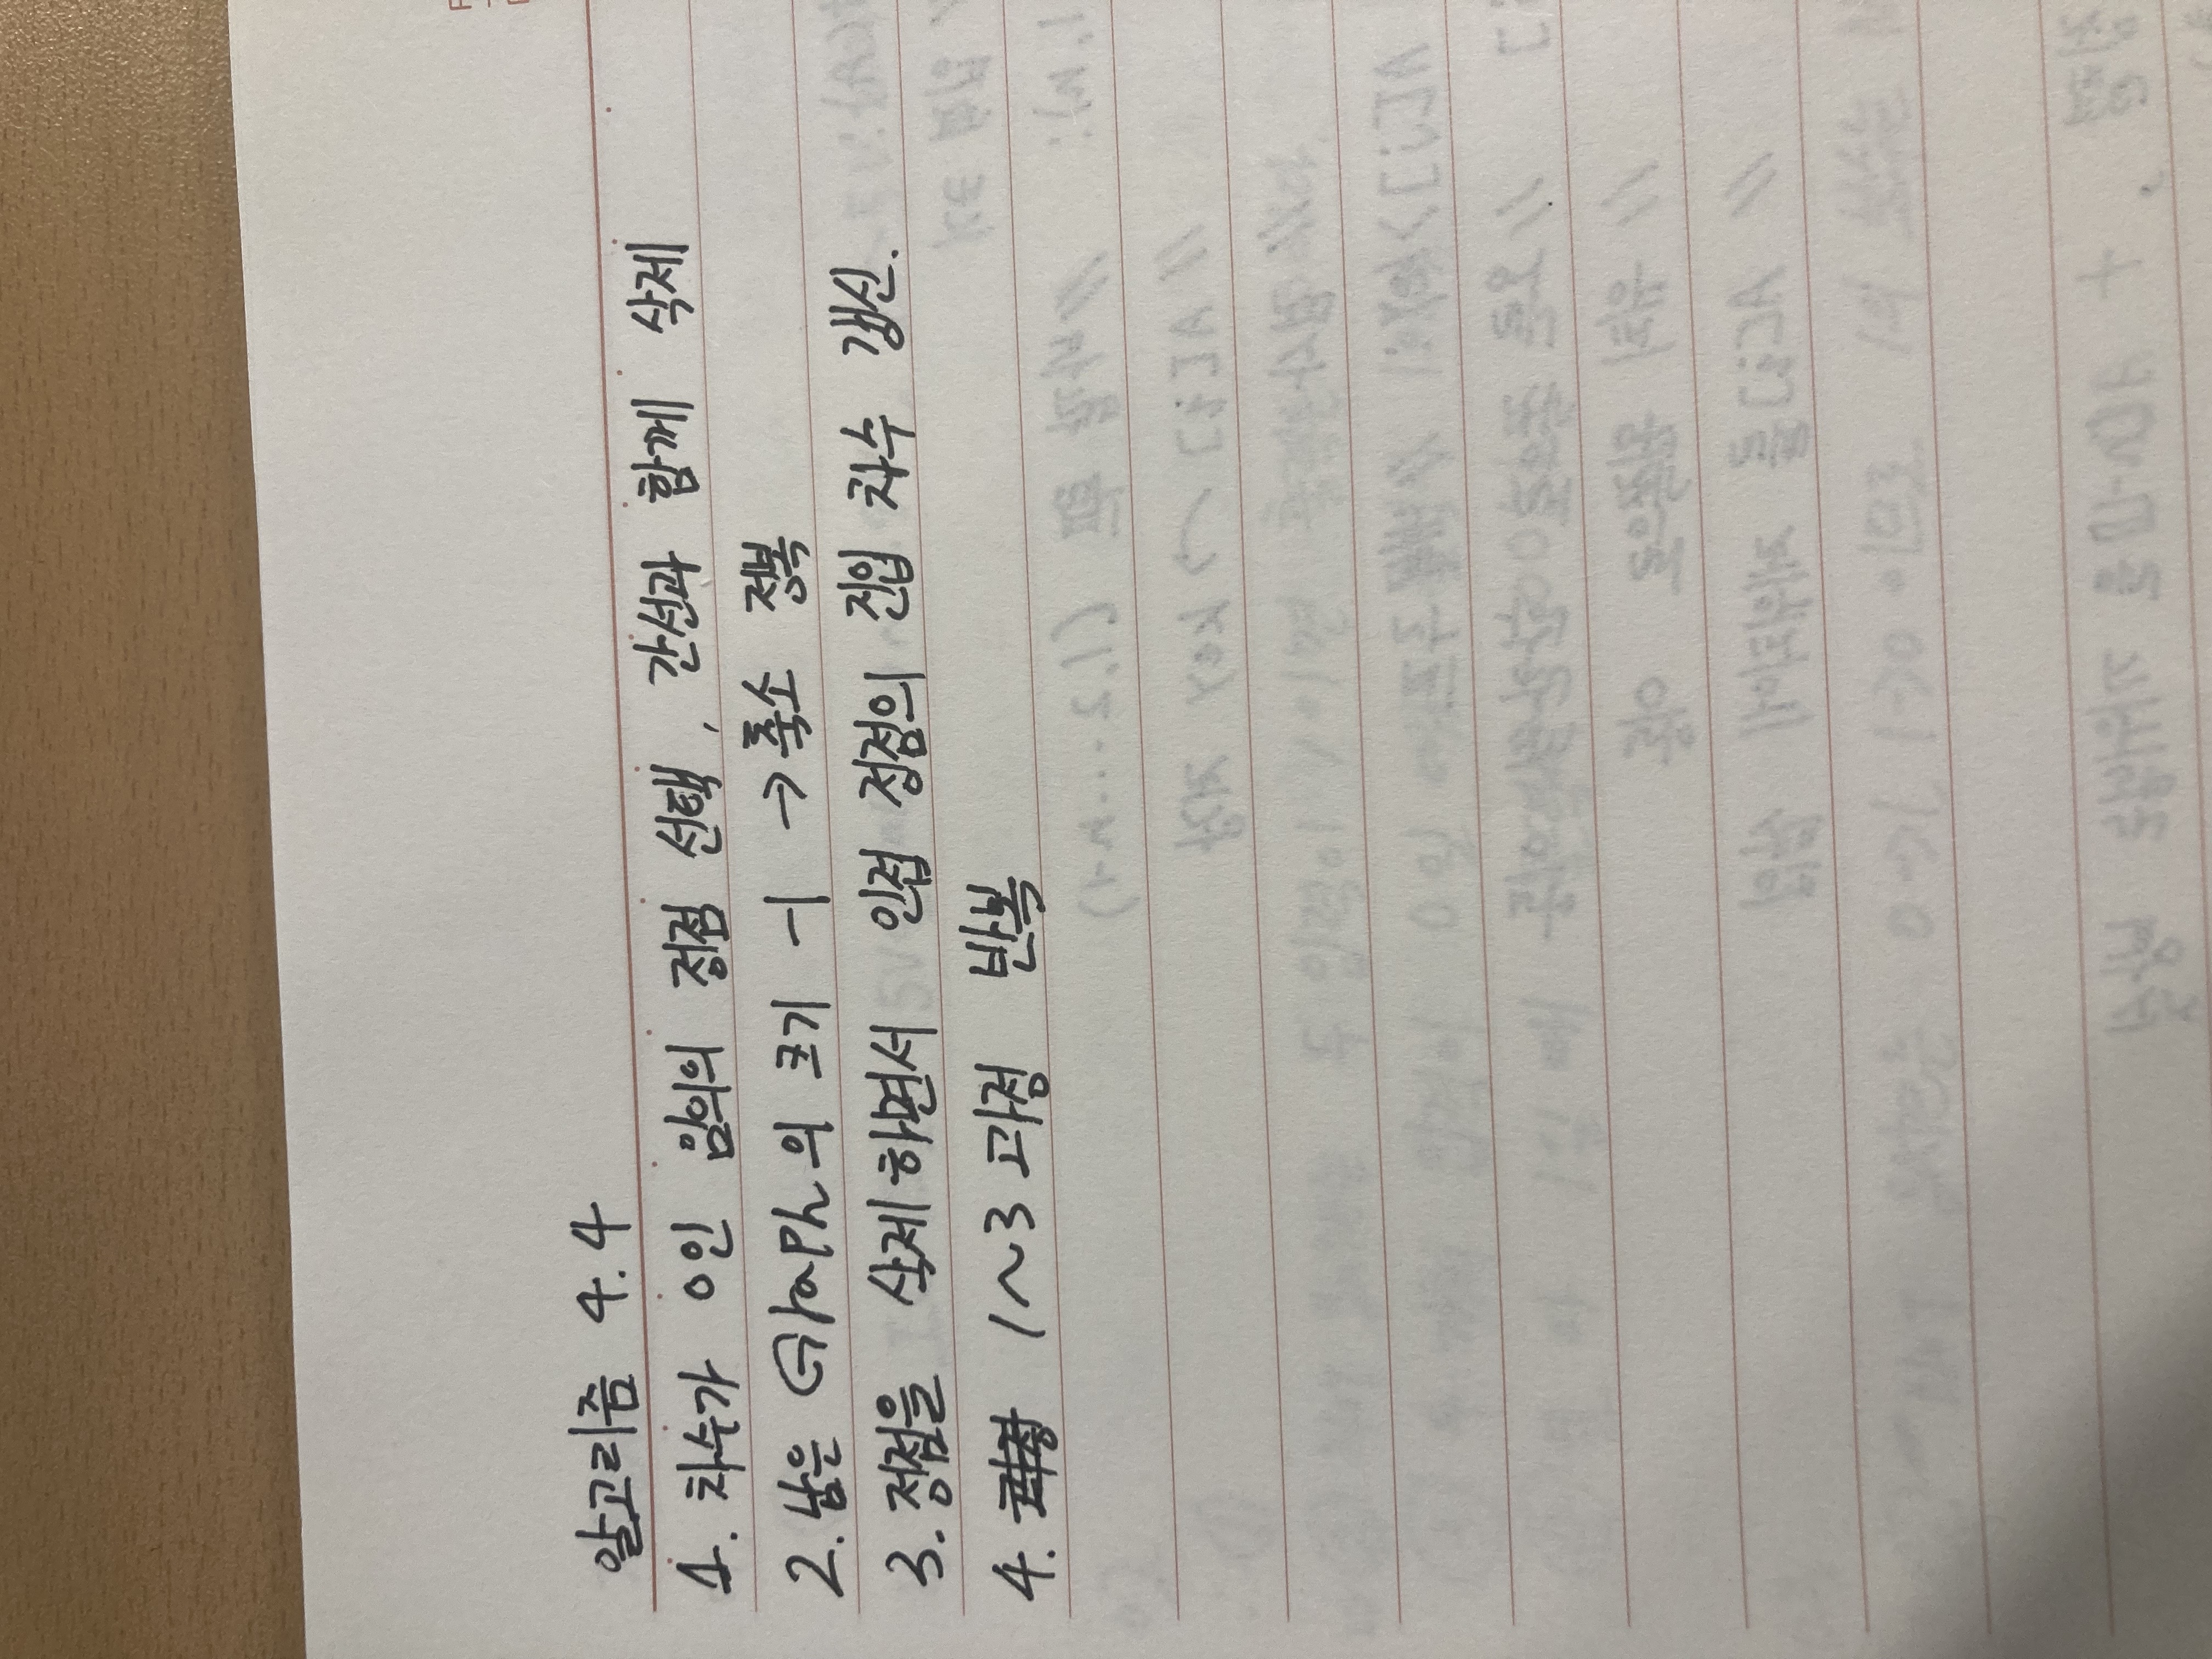

4) 코드 개요(입력 변수, 출력, 함수 설명) (MD)
함수명: topological_sort(graph)

입력 변수: 방향 그래프
출력: 순서 리스트
반환값: 모든 작업을 선후 관계에 맞게 순서대로 수행할 수 있는 순서를 나타내는 리스트나 배열
함수 설명: 1.각 노드의 진입 차수(in-degree)를 계산합니다. 진입 차수란 각 노드로 들어오는 간선의 개수를 의미합니다.
           2.진입 차수가 0인 모든 노드를 큐에 넣습니다.
           3.큐에서 노드를 하나씩 꺼내며 해당 노드를 방문하고, 이 노드와 연결된 모든 간선을 제거합니다. 이때, 간선을 제거하면서 연결된 노드들의 진입 차수를 감소시킵니다.
           4.새롭게 진입 차수가 0이 된 노드들을 큐에 넣습니다.
           5. 큐가 빌 때까지 3번과 4번의 과정을 반복합니다.

  5) 코드 (PY,C)

In [ ]:
def topological_sort(graph) :
    inDeg = {}
    for v in graph :
        inDeg[v] = 0
    for ㅍ in graph :
        for u in graph[v]:
            inDeg[u] += 1

    vlist = []
    for v in graph :
        if inDeg[v] ==0 :
            vlist.append(v)

    while vlist :
        v = vlist.pop()
        print(v, end=' ')

        for u in graph[v] :
            inDeg -= 1
            if inDeg[u]==0 :
                vlist.append(u)

6) 테스트 코드  (PY,C) , 입력을 바꾸어서

In [8]:
def topological_sort(graph):
    inDeg = {}
    for v in graph:
        inDeg[v] = 0
    
    # 진입 차수 계산
    for v in graph:
        for u in graph[v]:
            inDeg[u] += 1

    vlist = []
    for v in graph:
        if inDeg[v] == 0:
            vlist.append(v)

    while vlist:
        v = vlist.pop()
        print(v, end=' ')

        # 연결된 노드들의 진입 차수를 감소시키고, 진입 차수가 0이 되면 큐에 추가
        for u in graph[v]:
            inDeg[u] -= 1
            if inDeg[u] == 0:
                vlist.append(u)

# 테스트를 위한 그래프
mygraph = {
    "A": {"C", "D"},
    "B": {"D", "E"},
    "C": {"D", "F"},
    "D": {"F"},
    "E": {"F"},
    "F": {}
}

print('topological_sort: ')
topological_sort(mygraph)
print()



topological_sort: 
B E A C D F 


7) 수행 결과 (MD, 결과 캡춰하여 이미지로 삽입)
 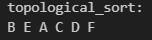

8) 복잡도 분석 (MD)
1. 초기화 1단계 2-7행: 모든 정점의 진입차수를 계산하는 단계이다. 3-4행은 n번 반복하므로 O(n)이다. 5-7행의 이중 루프는 모든 간선에 대해 처리한다. 그러므로 결국 7행은 간선의 개수만큼 반복된다.  그러므로 복잡도는 O(e)
2. 초기화 2단계 9-12행: 10행의 반복문은 정점의 수만큼 반복되므로 O(n)이다.
3. 주 알고리즘 14-21행: 이중 루프로 구성되어 있기에 복잡도는 O(e)이다.

따라서 전체 복잡도는 O(n+e)와 O(n) 및 O(e)의 합이고, 2장에 나온 빅오표기법에 의해 O(n+e)이다.

9) 협력 내용(조별, 팀별)
Factorial: 4.1, 4.2,  (서강찬)
Insertion sort: 4.3 Topological sort: 4.4 (홍민기)
Binary search: 4.5, 4.6 Power: 4.7, 4.8 (김민상)
K-search: 4.10, 4.11 (4.12) (주동현)